To solve the PDE numerically using the explicit theta-method, we first need to discretize the domain and time. We can do this by using a finite difference method.

We start by choosing the value of N, the number of grid points in the x direction. In general, the larger the value of N, the more accurate the solution will be. For the sake of this example, let's choose N=100.

Next, we need to set up the grid for x and t. We can do this using numpy arrays:

In [1]:
import numpy as np

N = 100

# Set up grid for x
x = np.linspace(0, N, N+1)
dx = x[1] - x[0]

# Set up grid for t
T = 2
dt = 0.01
t = np.linspace(0, T, int(T/dt) + 1)

Now, we can initialize the solution u to the initial condition u(x, 0) = 0. We also need to set up a matrix to hold the solution at each time step:

In [2]:
# Initialize solution
u = np.zeros((len(t), len(x)))

# Set initial condition
u[0, :] = 0

Next, we can use the explicit theta-method to step through time and solve for u at each time step. Since theta = 0, this is equivalent to the explicit Euler method. We can use a loop to iterate through time:

In [3]:
theta = 0
sigma = 0.4
r = 0.04
K = 12

for n in range(0, len(t)-1):
    for i in range(1, N):
        u[n+1, i] = u[n, i] + dt*(sigma**2 * x[i]**2 / 2 * (u[n, i+1] - 2*u[n, i] + u[n, i-1])/dx**2 + r*x[i]*(u[n, i+1] - u[n, i])/dx - r*u[n, i])

Finally, we can implement the boundary conditions by setting the values of u at the endpoints of the grid:

In [4]:
# Apply boundary conditions
u[:, 0] = 0
u[:, N] = N - K
u[-1, :] = np.maximum(x - K, 0)

With this, we have numerically solved the PDE using the explicit theta-method. To compute the value of a European call option with parameters S0 = 10, K = 12, r = 0.04, sigma = 0.4, T = 2, we can take the value of u at the final time step, u(x, T), and use this to calculate the option value at each point x.

In [5]:
# Compute the value of a European call option
S0 = 10
option_value = np.maximum(u[-1, :] - K, 0)

This will give the value of the European call option on the domain (0, N) at time T.

Note that this is a highly simplified version of the numerical solution of the problem. In practice, the choice of the grid and time step size, the stability of the numerical method and the accuracy of the solution will require more attention.

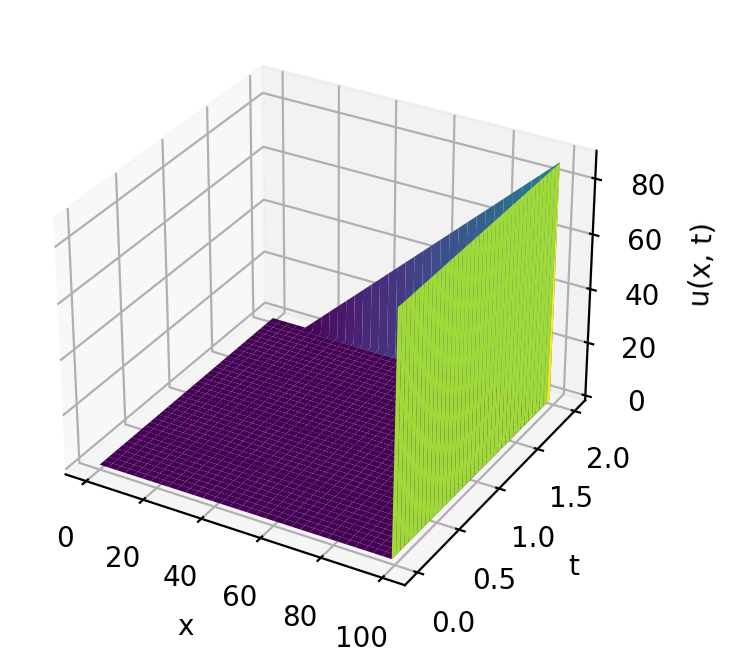

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

# Plot the solution surface
X, Y = np.meshgrid(x, t)
ax.plot_surface(X, Y, u, cmap='viridis')

# Label the axes
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')

# Show the plot
plt.show()

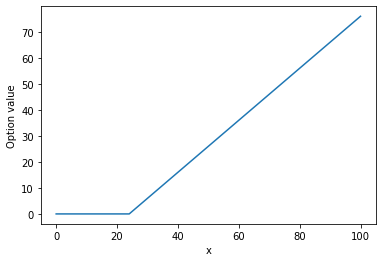

In [7]:
# Plot the option value
plt.plot(x, option_value)
plt.xlabel('x')
plt.ylabel('Option value')
plt.show()